In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-filter/emails.csv


Loading and Observing the Dataset

In [5]:
df = pd.read_csv('/kaggle/input/spam-filter/emails.csv')

In [6]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
df.shape

(5728, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


No Missing Values


In [9]:
df.isna().sum()

text    0
spam    0
dtype: int64

**Exploratory Data Analysis**

In [10]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

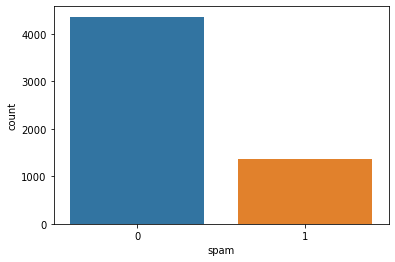

In [11]:
sns.countplot(df['spam'])

Checking the Length of email and it's relation

In [12]:
from nltk import word_tokenize

Function that tokenizes each and every email into words and returns it's length

In [13]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)

Applying the function to df['text'] and storing the count in another column

In [14]:
df['count']=df['text'].apply(count_words)

In [15]:
df['count']

0       325
1        90
2        88
3        99
4        53
       ... 
5723    298
5724    245
5725    516
5726    277
5727    445
Name: count, Length: 5728, dtype: int64

In [16]:
df.groupby('spam')['count'].mean()

spam
0    346.835321
1    267.896199
Name: count, dtype: float64

In [17]:
df

,text,spam,count
0,Subject: naturally irresistible your corporate...,1,325
1,Subject: the stock trading gunslinger fanny i...,1,90
2,Subject: unbelievable new homes made easy im ...,1,88
3,Subject: 4 color printing special request add...,1,99
4,"Subject: do not have money , get software cds ...",1,53
...,...,...,...
5723,Subject: re : research and development charges...,0,298
5724,"Subject: re : receipts from visit jim , than...",0,245
5725,Subject: re : enron case study update wow ! a...,0,516
5726,"Subject: re : interest david , please , call...",0,277


# Text Prepreocessing

**Function to Process the text data and 1. Remove Punctuation 2.Stop Words 3.Stemming**

In [18]:
import string
from nltk.corpus import stopwords


In [19]:
def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

### ***In natural language processing, useless words (data), are referred to as stop words.***

In [20]:
df['text']=df['text'].apply(process_text)

In [21]:
df['text']

0       Subject naturally irresistible corporate ident...
1       Subject stock trading gunslinger fanny merrill...
2       Subject unbelievable new homes made easy im wa...
3       Subject 4 color printing special request addit...
4       Subject money get software cds software compat...
                              ...                        
5723    Subject research development charges gpg forwa...
5724    Subject receipts visit jim thanks invitation v...
5725    Subject enron case study update wow day super ...
5726    Subject interest david please call shirley cre...
5727    Subject news aurora 5 2 update aurora version ...
Name: text, Length: 5728, dtype: object

**After cleaning the text. We will now carry out the process of Stemming to reduce infected words to their root**

In [22]:
df['text'].iloc[0]

'Subject naturally irresistible corporate identity lt really hard recollect company market full suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website make task much easier promise havinq ordered iogo company automaticaily become world ieader isguite ciear without good products effective business organization practicable aim hotat nowadays market promise marketing efforts become much effective list clear benefits creativeness hand made original logos specially done reflect distinctive company image convenience logo stationery provided formats easy use content management system letsyou change website content even structure promptness see logo drafts within three business days affordability marketing break make gaps budget 100 satisfaction guaranteed provide unlimited amount changes extra fees surethat love result collaboration look portfolio interested'

#### eg: stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate”

In [23]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [24]:
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

In [25]:
df['text']=df['text'].apply(stemming)

In [26]:
df.head()

,text,spam,count
0,Subject naturally irresistible corporate ident...,1,325
1,Subject stock trading gunslinger fanny merrill...,1,90
2,Subject unbelievable new homes made easy im wa...,1,88
3,Subject 4 color printing special request addit...,1,99
4,Subject money get software cds software compat...,1,53


**Now we will use Count Vectorizer to convert string data into Bag of Words ie Known Vocabulary**


### It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
message_bow = vectorizer.fit_transform(df['text'])

In [37]:
a = message_bow.toarray()
print(a[0])

[0 0 0 ... 0 0 0]


**Splitting the Data[](http://)**

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(message_bow,df['spam'],test_size=0.20)

# Creating the Model and it's Evaluation

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0)
LR.fit(X_train,y_train)
# nb= MultinomialNB()
# nb.fit(X_train,y_train)
# y_pred = nb.predict(X_test)
y_pred = LR.predict(X_test)


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       873
           1       0.99      0.99      0.99       273

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



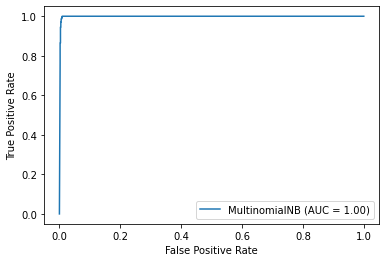

In [40]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(nb,X_test,y_test)

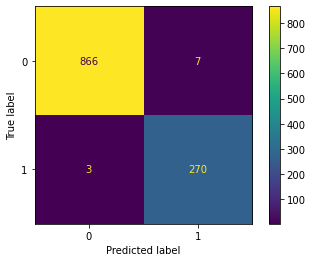

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)

In [46]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("Accuracy using Cross Validation is :",np.mean(cross_val_score(nb,message_bow,df['spam'],cv=kfold,scoring="accuracy"))*100," %")

Accuracy using Cross Validation is : 99.05727154255928  %
